# Titantic Survival Prediction
The goal of this dataset is predict wheather someone will survive the crash of Titanic

<a href="https://www.kaggle.com/c/titanic">Kaggle Dataset</a>

Load Dependencies

In [1]:
import os
import numpy
import pandas
import platform
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

%matplotlib inline

In [2]:
print("Python Version: {}".format(platform.python_version()))
print("Seaborn Version: {0}".format(sns.__version__))
print("Matplotlib Version: {0}".format(matplotlib.__version__))
print("Numpy Version: {0}".format(numpy.__version__))
print("Sklearn Version: {0}".format(sklearn.__version__))
print("Pandas Version: {0}".format(pandas.__version__))

Python Version: 3.6.6
Seaborn Version: 0.9.0
Matplotlib Version: 3.0.2
Numpy Version: 1.13.3
Sklearn Version: 0.19.1
Pandas Version: 0.23.0


# Data Set Info

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes
<b>pclass:</b> A proxy for socio-economic status (SES)
<br>
1st = Upper
<br>
2nd = Middle
<br>
3rd = Lower
<br>

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br>

<b>sibsp:</b> The dataset defines family relations in this way...
<br>
Sibling = brother, sister, stepbrother, stepsister
<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way...
<br>
Parent = mother, father
<br>
Child = daughter, son, stepdaughter, stepson
<br>
Some children travelled only with a nanny, therefore parch=0 for them.



# Load Training and Testing Data

In [3]:
dataDirectory = "Data"

#Create File Path to Training and Testing Directores
trainDirectory = os.path.join(dataDirectory, "Train")
testDirectory = os.path.join(dataDirectory, "Test")

#Create File Paths for Training and Testing Data
trainFilePath = os.path.join(trainDirectory, "train.csv")
testFilePath = os.path.join(testDirectory, "test.csv")

#Load training and testing data into Data Frames
trainDF = pandas.read_csv(trainFilePath)
testDF = pandas.read_csv(testFilePath)

In [4]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Get Columns and their data types
trainDF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Percentage of Survives by Gender

In [7]:
#Group by Survived
survivedDF = trainDF.groupby(["Survived"])
survivedBySexDF = survivedDF["Sex"].value_counts()

#Total Number of People by Survival
survivedCountsDF = trainDF.groupby(["Survived"]).count()["Sex"]
survivedCountsDF

#Get Percentages of Gender by Survival
percentageSurvivedDF = (survivedBySexDF/survivedCountsDF)*100
percentageSurvivedDF.sort_index(inplace=True)
percentageSurvivedDF.head()

Survived  Sex   
0         female    14.754098
          male      85.245902
1         female    68.128655
          male      31.871345
Name: Sex, dtype: float64

In [8]:
#Pie Chart Color
colors = ["lightcoral", "Deepskyblue"]

Text(0, 0.5, 'Percentage Died')

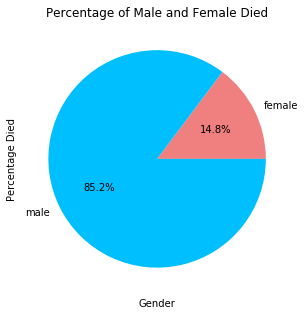

In [9]:
#Pie Chart for Percentage of Gender Died
diedPlot = percentageSurvivedDF.loc[0].plot.pie(figsize=(5,5), autopct="%1.1f%%", colors=colors)
diedPlot.set_title("Percentage of Male and Female Died")
diedPlot.set_xlabel("Gender")
diedPlot.set_ylabel("Percentage Died")

Text(0, 0.5, 'Percentage Survived')

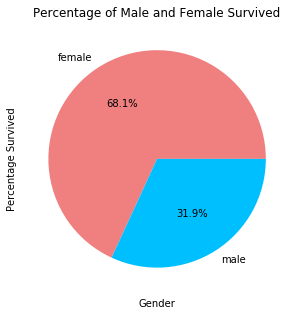

In [10]:
#Pie Chart for Percentage of Gender Survived
survivedPlot = percentageSurvivedDF.loc[1].plot.pie(figsize=(5,5), autopct="%1.1f%%", colors=colors)
survivedPlot.set_title("Percentage of Male and Female Survived")
survivedPlot.set_xlabel("Gender")
survivedPlot.set_ylabel("Percentage Survived")

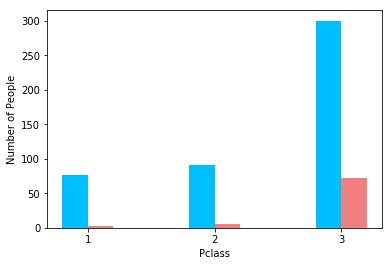

In [11]:
width = 0.20# the width of the bars
ind = numpy.arange(3)

survivedDF = trainDF[trainDF["Survived"] == 0]
survivedMaleDF = survivedDF[survivedDF["Sex"] == "male"]
survivedFemaleDF = survivedDF[survivedDF["Sex"] == "female"]

fig, ax = plt.subplots()
malePclassDF = survivedMaleDF.groupby(["Pclass"])["Name"].count()
femalePclassDF = survivedFemaleDF.groupby(["Pclass"])["Name"].count()
ax.bar(ind - width/2, malePclassDF, width, color="Deepskyblue")
ax.bar(ind + width/2, femalePclassDF, width, color="lightcoral")
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', "3"))
ax.set_xlabel("Pclass")
ax.set_ylabel("Number of People")
plt.show()

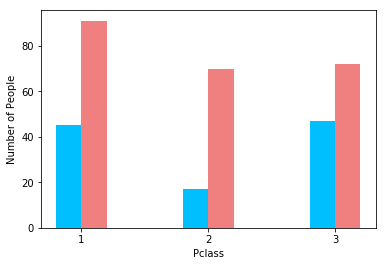

In [12]:
survivedDF = trainDF[trainDF["Survived"] == 1]
survivedMaleDF = survivedDF[survivedDF["Sex"] == "male"]
survivedFemaleDF = survivedDF[survivedDF["Sex"] == "female"]

fig, ax = plt.subplots()
malePclassDF = survivedMaleDF.groupby(["Pclass"])["Name"].count()
femalePclassDF = survivedFemaleDF.groupby(["Pclass"])["Name"].count()
ax.bar(ind - width/2, malePclassDF, width, color="Deepskyblue")
ax.bar(ind + width/2, femalePclassDF, width, color="lightcoral")
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', "3"))
ax.set_xlabel("Pclass")
ax.set_ylabel("Number of People")
plt.show()

# Merge Training and Testing Data

In [13]:
#Drop Survived Column
cleanTrainDF = trainDF.drop(columns=["Survived"])

#Copy Testing Dataset
cleanTestDF = testDF.copy()

#Add Dataset label
cleanTrainDF["Dataset"] = "Train"
cleanTestDF["Dataset"] = "Test"

#Combine Training and Testing Dataset
combinedDF = pandas.concat([cleanTrainDF, cleanTestDF], sort=False)
combinedDF.reset_index(inplace=True)
combinedDF.drop(columns=["index"], inplace=True)
combinedDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


# Clean up Data

If the age does not exists for passenger replace it with that gender's mean age

In [14]:
combinedDF.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Dataset           0
dtype: int64

In [15]:
#Get Mean Age for male and fmeale
meanAge = combinedDF.groupby(["Sex"]).mean()["Age"]
meanFemaleAge = meanAge["female"]
meanMaleAge = meanAge["male"]

def MeanAge(row):
    """
    If age is not a number, replace with that passenger's gender's median age
    """
    if(pandas.isna(row["Age"])):
        if(row["Sex"] == "female"):
            return meanFemaleAge
        else:
            return meanMaleAge
    else:
        return row["Age"]
    
combinedDF["Age"] = combinedDF.apply(MeanAge, axis=1)    

If Embarked is 

In [16]:
trainDF["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
combinedDF["Embarked"] = combinedDF["Embarked"].fillna("X")
embarkedMap = {"S": 0, "C": 1, "Q":2, "X":3}
combinedDF["EmbarkedMap"] = combinedDF["Embarked"].map(lambda x: "X" if(pandas.isna(x)) else x)


In [18]:
combinedDF["Cabin"] = combinedDF["Cabin"].fillna("X")
combinedDF["Cabin Letter"] = combinedDF[combinedDF["Cabin"].notnull()]["Cabin"].astype(str).str[0]

In [19]:
combinedDF["Cabin Letter"].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin Letter, dtype: int64

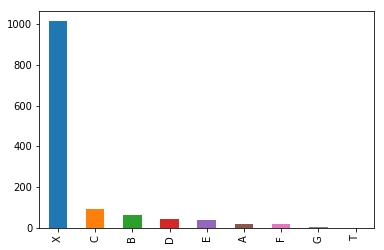

In [20]:
combinedDF["Cabin Letter"].value_counts().plot(kind="bar")

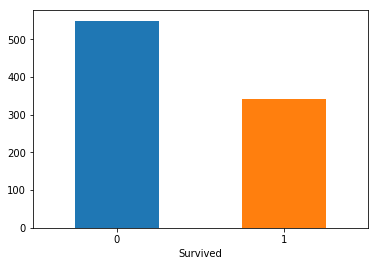

In [21]:
trainDF.groupby(["Survived"]).count()["Name"].plot.bar(rot=0)

In [22]:
trainDF["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
trainDF["Pclass"].unique()

array([3, 1, 2])

In [24]:
trainDF["Sex"].unique()

array(['male', 'female'], dtype=object)

In [25]:
trainDF["Age"].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [26]:
trainDF["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [27]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
trainDF["Gender"] = trainDF.apply(lambda x: 0 if(x["Sex"] == "male") else 1, axis=1)

In [29]:
trainDF["Embarked"].unique()
trainDF["Embarked"] = trainDF["Embarked"].map(lambda x: "X" if(pandas.isna(x)) else x)
trainDF["Embarked"].unique()
embarkedMap = {"S": 0, "C": 1, "Q":2, "X":3}
trainDF["EmbarkedMap"] = trainDF["Embarked"].map(lambda x: "X" if(pandas.isna(x)) else x)

In [30]:
combinedDF.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.909496,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.889182,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


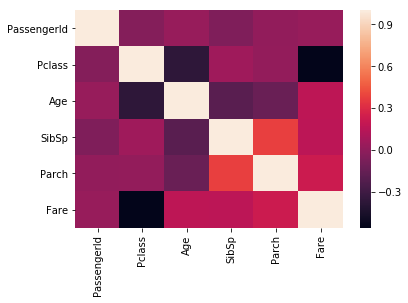

In [31]:
plt.clf()
corr = combinedDF.corr()
sns.heatmap(corr)
plt.show()

<Figure size 432x288 with 0 Axes>

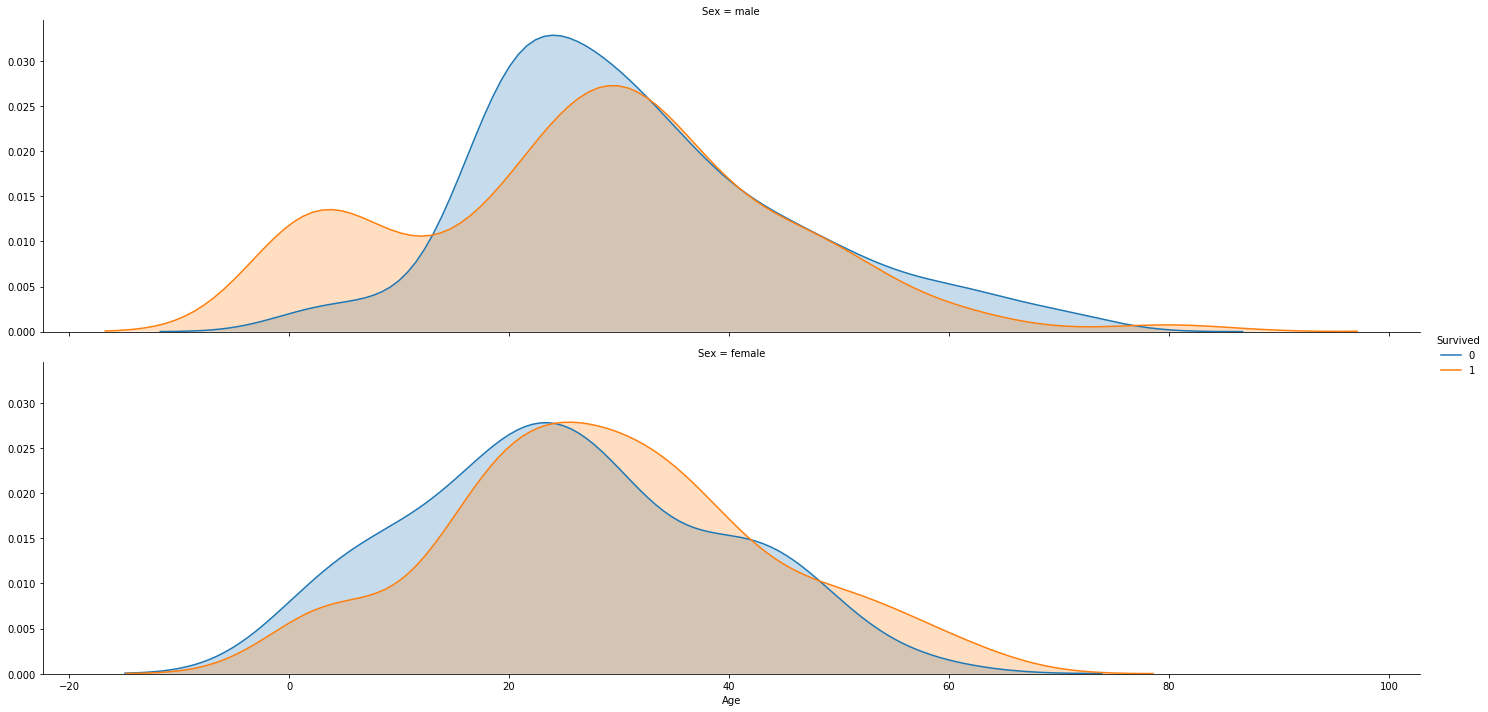

In [32]:
plt.clf()

facet = sns.FacetGrid(trainDF, hue='Survived', aspect=4, row='Sex', height=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

plt.show()

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
X = trainDF["Age"].values.reshape(-1,1)
y = trainDF["Survived"].values.reshape(-1,1)
# y = 1 * x_0 + 2 * x_1 + 3
#y = numpy.dot(, numpy.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
trainDF["Survived"].shape

In [ ]:
trainDF["Age"].shape

In [ ]:
reg.score(X, y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_ 

In [ ]:
reg.predict(numpy.array([[4]]))

In [ ]:
plt.clf()
plt.scatter(X[trainDF["Survived"] == 0],trainDF[trainDF["Survived"] == 0]["Fare"].values.reshape(-1,1))
plt.scatter(X[trainDF["Survived"] == 1],trainDF[trainDF["Survived"] == 1]["Fare"].values.reshape(-1,1), color="r")
plt.show()

In [ ]:
plt.clf()
plt.bar(X[trainDF["Survived"] == 0], trainDF[trainDF["Survived"] == 0]["Pclass"].values.reshape(-1,1))
plt.bar(X[trainDF["Survived"] == 1], trainDF[trainDF["Survived"] == 1]["Pclass"].values.reshape(-1,1), color="r")
plt.show()

In [ ]:
plt.clf()
g = sns.barplot(x="Sex",y="Survived",data=trainDF, palette = 'muted')
g = g.set_ylabel("Survival Probability")
plt.show()

In [ ]:
trainDF["Pclass"].unique()